In [1]:
#importing and preparing the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab
import seaborn as sns
from matplotlib.pyplot import MaxNLocator, FuncFormatter 


Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv("amazon.csv", encoding = 'latin1')
df.head(5)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [3]:
df['number'].describe()

count    6454.000000
mean      108.293163
std       190.812242
min         0.000000
25%         3.000000
50%        24.000000
75%       113.000000
max       998.000000
Name: number, dtype: float64

In [4]:
df['month'].replace(to_replace = 'Janeiro', value = 'Jan', inplace = True)
df['month'].replace(to_replace = 'Fevereiro', value = 'Feb', inplace = True)
df['month'].replace(to_replace = 'Março', value = 'Mar', inplace = True)
df['month'].replace(to_replace = 'Abril', value = 'Apr', inplace = True)
df['month'].replace(to_replace = 'Maio', value = 'May', inplace = True)
df['month'].replace(to_replace = 'Junho', value = 'Jun', inplace = True)
df['month'].replace(to_replace = 'Julho', value = 'Jul', inplace = True)
df['month'].replace(to_replace = 'Agosto', value = 'Aug', inplace = True)
df['month'].replace(to_replace = 'Setembro', value = 'Sep', inplace = True)
df['month'].replace(to_replace = 'Outubro', value = 'Oct', inplace = True)
df['month'].replace(to_replace = 'Novembro', value = 'Nov', inplace = True)
df['month'].replace(to_replace = 'Dezembro', value = 'Dec', inplace = True)

In [5]:
# groupby data by year, state, month

data = df.groupby(by = ['year','state','month']).sum().reset_index()
data.head(10)

,year,state,month,number
0,1998,Acre,Apr,0.0
1,1998,Acre,Aug,130.0
2,1998,Acre,Dec,7.0
3,1998,Acre,Feb,0.0
4,1998,Acre,Jan,0.0
5,1998,Acre,Jul,37.0
6,1998,Acre,Jun,3.0
7,1998,Acre,Mar,0.0
8,1998,Acre,May,0.0
9,1998,Acre,Nov,0.0


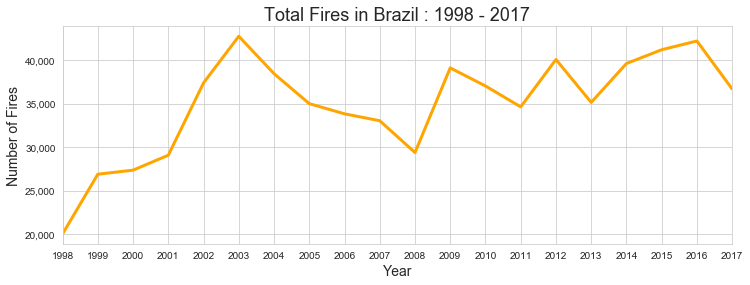

In [6]:
# visualise

sns.set_style('whitegrid')

plt.figure(figsize(12,4))

ax = sns.lineplot(x = 'year', y = 'number', data = df, estimator = 'sum', color = 'orange', lw = 3, err_style = None)

plt.title('Total Fires in Brazil : 1998 - 2017', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Number of Fires', fontsize = 14)

ax.xaxis.set_major_locator(plt.MaxNLocator(19))
ax.set_xlim(1998, 2017)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()

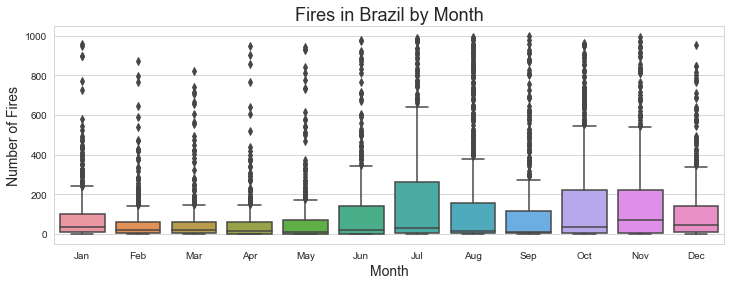

In [7]:
plt.figure(figsize=(12,4))

sns.boxplot(x = 'month', order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec'], 
            y = 'number', data = df)

plt.title('Fires in Brazil by Month', fontsize = 18)
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Number of Fires', fontsize = 14)
plt.show()

In [8]:
df.groupby(by = 'state')['number'].sum().sort_values(ascending = False).head(10)

state
Mato Grosso     96246.028
Paraiba         52435.918
Sao Paulo       51121.198
Rio             45160.865
Bahia           44746.226
Piau            37803.747
Goias           37695.520
Minas Gerais    37475.258
Tocantins       33707.885
Amazonas        30650.129
Name: number, dtype: float64

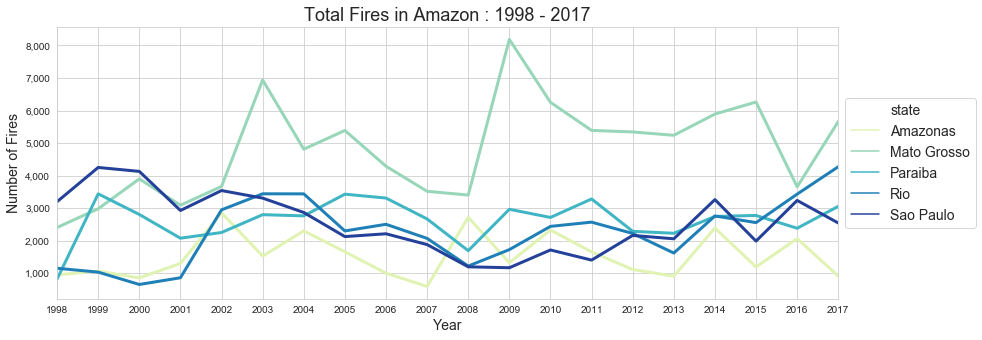

In [9]:
year_mo_state_top_states = df[df['state'].isin(['Amazonas','Mato Grosso','Paraiba','Sao Paulo','Rio'])].groupby(by = ['year','state', 'month']).sum().reset_index()

plt.figure(figsize=(14,5))

ax = sns.lineplot(x = 'year', y = 'number', data = year_mo_state_top_states, hue = 'state', estimator = 'sum', color = 'orange', lw = 3, 
                  err_style = None, palette = 'YlGnBu')

plt.title('Total Fires in Amazon : 1998 - 2017', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Number of Fires', fontsize = 14)

ax.xaxis.set_major_locator(plt.MaxNLocator(19))
ax.set_xlim(1998, 2017)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 14})